You can run an existing model on an existing benchmark by calling a single function, e.g. here a `distilgpt2` on the behavioral reading-times benchmark `Futrell2018-pearsonr`. (The below output was run on a GPU, it takes ~1-2 hours on CPU to run all the text on the model.)

In [1]:
from brainscore_language import score

model_score = score(model_identifier='distilgpt2', benchmark_identifier='Futrell2018-pearsonr')
print(model_score)

/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/brainscore_core/metrics/__init__.py:16: FutureWarning: xarray subclass Score should explicitly define __slots__
  class Score(DataAssembly):
Error processing line 1 of /home/hadarla/.local/lib/python3.10/site-packages/vision-1.0.0-nspkg.pth:

  Traceback (most recent call last):
    File "/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site.py", line 186, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 568, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored


digest text: 100%|██████████████████████████████████████████████████████████████████████████████████| 10256/10256 [02:38<00:00, 64.63it/s]
/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/xarray/core/concat.py:500: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


<xarray.Score ()>
array(0.361448)
Attributes:
    raw:                   <xarray.Score ()>\narray(0.31013794)\nAttributes:\...
    ceiling:               <xarray.Score ()>\narray(0.85804302)\nAttributes:\...
    model_identifier:      distilgpt2
    benchmark_identifier:  Futrell2018-pearsonr


The resulting `model_score` holds the normalized similarity between the given model on the given benchmark,
and additionally contains more detailed information, e.g. about the correlation p-value:

In [2]:
print(model_score.raw)

<xarray.Score ()>
array(0.31013794)
Attributes:
    rvalue:   0.3101379357065882
    pvalue:   6.257099288927393e-217


We can also run e.g. an embedding model `glove-840b` on a neural benchmark `Pereira2018.243sentences-linear`:

In [3]:
from brainscore_language import score

model_score = score(model_identifier='glove-840b', benchmark_identifier='Pereira2018.243sentences-linear')
print(model_score)

Error processing line 1 of /home/hadarla/.local/lib/python3.10/site-packages/vision-1.0.0-nspkg.pth:

  Traceback (most recent call last):
    File "/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site.py", line 186, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 568, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored


Word honey-making not present in model
Word they're not present in model
Word blindne not present in model
Word blindne not present in model
Word blindne not present in model
Word blindne not present in model
Word infectiou not present in model
Word deficiencie not present in model
Word blindne not present in model
Word $10000 not present in model
Word bankruptcie not present in model
Word lurche not present in model
Word delicacie not present in model
Word couldn't not present in model
Word whipped-in not present in model
Word they're not present in model
Word tenderne not present in model
Word redne not present in model
Word redne not present in model
Word prestigiou not present in model
Word darkne not present in model
Word half-closing not present in model
Word wellne not present in model
Word food-scarce not present in model
Word they're not present in model
Word harnesse not present in model
Word Free-climbing not present in model
Word stresse not present in model
Word stresse no

<xarray.Score ()>
array(0.24217171)
Attributes:
    raw:                   <xarray.Score ()>\narray(0.08567776)\nAttributes:\...
    ceiling:               <xarray.Score 'data' ()>\narray(0.35378928)\nAttri...
    model_identifier:      glove-840b
    benchmark_identifier:  Pereira2018.243sentences-linear


Similarly for neural benchmarks, we can look at more detailed information, e.g. the per-split and per-voxel predictivity. Note that `model_score.raw` is the unceiled score, and `model_score.raw.raw` are then the non-aggregated scores over splits and voxels.

In [62]:
print(model_score.raw.raw[0])

<xarray.Score (neuroid: 8031)>
array([ 0.21013038,  0.32312842,  0.04459436, ..., -0.04660973,
        0.10268185,  0.14235734])
Coordinates:
    split            int64 0
  * neuroid          (neuroid) MultiIndex
  - subject          (neuroid) object '018' '018' '018' ... '426' '426' '426'
  - voxel_num        (neuroid) int64 1001 1002 10026 10027 ... 9986 9987 9988
  - filter_strategy  (neuroid) float64 nan nan nan nan nan ... nan nan nan nan
  - atlas_selection  (neuroid) object 'from90to100prcnt' ... 'from90to100prcnt'
  - roi              (neuroid) object 'LH_AntTemp' ... 'RH_PostTemp'
  - indices_in_3d    (neuroid) int64 131599 131600 249945 ... 234883 234884
  - col_to_coord_1   (neuroid) int64 64 65 68 69 66 67 68 ... 12 13 14 15 16 17
  - col_to_coord_2   (neuroid) int64 51 51 29 29 51 51 30 ... 29 29 29 29 29 29
  - col_to_coord_3   (neuroid) int64 18 18 34 34 18 18 34 ... 32 32 32 32 32 32
  - neuroid_id       (neuroid) object '018.1001' '018.1002' ... '426.9988'


In [7]:
import numpy as np
from matplotlib import pyplot

np.shape(model_score.raw.raw)


(10, 8031)

In [83]:
model_score.raw.raw[0].roi

<xarray.Score 'roi' (neuroid: 8031)>
array(['LH_AntTemp', 'LH_AntTemp', 'LH_PostTemp', ..., 'RH_PostTemp',
       'RH_PostTemp', 'RH_PostTemp'], dtype=object)
Coordinates:
    split            int64 0
  * neuroid          (neuroid) MultiIndex
  - subject          (neuroid) object '018' '018' '018' ... '426' '426' '426'
  - voxel_num        (neuroid) int64 1001 1002 10026 10027 ... 9986 9987 9988
  - filter_strategy  (neuroid) float64 nan nan nan nan nan ... nan nan nan nan
  - atlas_selection  (neuroid) object 'from90to100prcnt' ... 'from90to100prcnt'
  - roi              (neuroid) object 'LH_AntTemp' ... 'RH_PostTemp'
  - indices_in_3d    (neuroid) int64 131599 131600 249945 ... 234883 234884
  - col_to_coord_1   (neuroid) int64 64 65 68 69 66 67 68 ... 12 13 14 15 16 17
  - col_to_coord_2   (neuroid) int64 51 51 29 29 51 51 30 ... 29 29 29 29 29 29
  - col_to_coord_3   (neuroid) int64 18 18 34 34 18 18 34 ... 32 32 32 32 32 32
  - neuroid_id       (neuroid) object '018.1001' '018.1002' ... '426.9988'

In [88]:
np.unique(model_score.raw.raw[0].roi)

array(['LH_AngG', 'LH_AntTemp', 'LH_IFG', 'LH_IFGorb', 'LH_MFG',
       'LH_PostTemp', 'RH_AngG', 'RH_AntTemp', 'RH_IFG', 'RH_IFGorb',
       'RH_MFG', 'RH_PostTemp'], dtype=object)

In [93]:
roi_score_all = []
for roi_region in np.unique(model_score.raw.raw[0].roi):
    model_score_raw_roi_region = model_score.raw.raw[0].sel(roi=roi_region)
    print(roi_region)
    roi_score = np.mean(model_score_raw_roi_region).data
    print(roi_score)
    roi_score_all.append(roi_score)

LH_AngG
0.12550887729576513
LH_AntTemp
0.06179208251674223
LH_IFG
0.07750293481130802
LH_IFGorb
0.07566015559095997
LH_MFG
0.23790695625546537
LH_PostTemp
0.09840395045744761
RH_AngG
0.13265015864794946
RH_AntTemp
0.11066046870015632
RH_IFG
0.036538480498821385
RH_IFGorb
0.08097812939898015
RH_MFG
0.10602263222626122
RH_PostTemp
0.041356218532488644


/tmp/ipykernel_67000/667586370.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


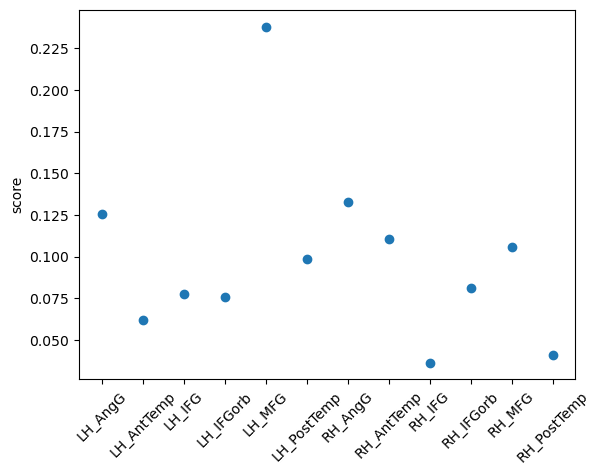

In [96]:
import numpy as np
from matplotlib import pyplot

y = roi_score_all
fig, ax = pyplot.subplots()
x = np.unique(model_score.raw.raw[0].roi)
ax.scatter(x, y)
ax.set_xticks(x)
ax.set_xticklabels(x, rotation=45)
ax.set_ylabel('score')
fig.show()